In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools

poised = pd.read_csv('DSiP_Batch-4_Plate1308634_PO8005504_DMSO.csv')
poised = poised.loc[poised['Smiles'].fillna('').astype(bool)]
PandasTools.AddMoleculeColumnToFrame(poised,'Smiles','Molecule', includeFingerprints=True)
logo = Chem.MolFromSmiles('CC(=O)c1ccccc1Cc1ccc(C)cc1')
poised.loc[poised.Molecule >= logo]
dsi = PandasTools.LoadSDF('Enamine_DSI-poised_Library_plated_860cmds_20210302.sdf',smilesName='SMILES',molColName='Molecule', includeFingerprints=True)

In [27]:
old = pd.read_csv('DSiP_Batch-1_Plate773151_PO2016772_DMSO.csv')
old = old.loc[old['Smile'].fillna('').astype(bool)]

In [16]:
poised['is_kept'] = poised['Catalog ID'].isin(dsi['Catalog ID'].values)
dsi['is_kept'] = dsi['Catalog ID'].isin(poised['Catalog ID'].values)

In [29]:
len(dsi), len(poised), len(old)

(860, 988, 768)

,Cxsmiles,Smiles,Catalog ID,Plate_ID_1,Plate_ID_2,Plate_ID_3,Plate_ID_4,Well,"V, µL","Conc, mM",...,PO,Salt smiles,Salt_name,Salt_ratio,MW_salt,Stereochem.data,Geometric.isomer,Chemical name,Molecule,is_kept
860,CNc1cnc2ccccc2n1,CNc1cnc2ccccc2n1,Z728939702,1308634-Y4-A01,1308634-Y4-B01,1308634-Y4-C01,1308634-Y4-D01,F38,4.0,500.0,...,8005504.0,NaN,NaN,NaN,0.0,Achiral,None,N-methylquinoxalin-2-amine,,False
861,Fc1cn[nH]c1,Fc1cn[nH]c1,Z1198279205,1308634-Y4-A01,1308634-Y4-B01,1308634-Y4-C01,1308634-Y4-D01,G38,4.0,500.0,...,8005504.0,NaN,NaN,NaN,0.0,Achiral,None,4-fluoro-1H-pyrazole,,False
862,Fc1cc(F)c2OCC=Cc2c1,Fc1cc(F)c2OCC=Cc2c1,Z1198275935,1308634-Y4-A01,1308634-Y4-B01,1308634-Y4-C01,1308634-Y4-D01,H38,4.0,500.0,...,8005504.0,NaN,NaN,NaN,0.0,Achiral,None,"6,8-difluoro-2H-chromene",,False
863,CNc1nccc2ccccc12,CNc1nccc2ccccc12,Z1216833237,1308634-Y4-A01,1308634-Y4-B01,1308634-Y4-C01,1308634-Y4-D01,I38,4.0,500.0,...,8005504.0,NaN,NaN,NaN,0.0,Achiral,None,N-methylisoquinolin-1-amine,,False
865,Cc1nccn1c2cccnc2,Cc1nccn1c2cccnc2,Z1217131798,1308634-Y4-A01,1308634-Y4-B01,1308634-Y4-C01,1308634-Y4-D01,K38,4.0,500.0,...,8005504.0,NaN,NaN,NaN,0.0,Achiral,None,3-(2-methyl-1H-imidazol-1-yl)pyridine,,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,FC(F)(F)c1ccc2ccncc2c1,FC(F)(F)c1ccc2ccncc2c1,Z1198320823,1308634-Y4-A01,1308634-Y4-B01,1308634-Y4-C01,1308634-Y4-D01,Y42,4.0,500.0,...,8005504.0,NaN,NaN,NaN,0.0,Achiral,None,7-(trifluoromethyl)isoquinoline,,False
984,Cn1cc(nc1C2CCCNC2)C(F)(F)F,Cn1cc(nc1C2CCCNC2)C(F)(F)F,Z2048325751,1308634-Y4-A01,1308634-Y4-B01,1308634-Y4-C01,1308634-Y4-D01,Z42,4.0,500.0,...,8005504.0,NaN,NaN,NaN,0.0,Racemic or presumed racemic or meso,None,3-[1-methyl-4-(trifluoromethyl)-1H-imidazol-2-...,,False
985,CCc1ccc(o1)C2CCCCN2,CCc1ccc(o1)C2CCCCN2,Z1198734834,1308634-Y4-A01,1308634-Y4-B01,1308634-Y4-C01,1308634-Y4-D01,AA42,4.0,500.0,...,8005504.0,NaN,NaN,NaN,0.0,Racemic or presumed racemic or meso,None,2-(5-ethylfuran-2-yl)piperidine,,False
986,NCc1ccn2ccnc2c1,NCc1ccn2ccnc2c1,Z1203586731,1308634-Y4-A01,1308634-Y4-B01,1308634-Y4-C01,1308634-Y4-D01,AB42,4.0,500.0,...,8005504.0,NaN,NaN,NaN,0.0,Achiral,None,"1-{imidazo[1,2-a]pyridin-7-yl}methanamine",,False

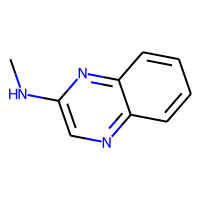
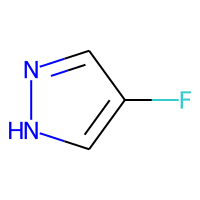
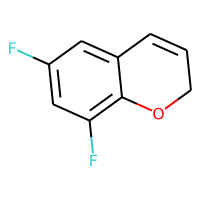
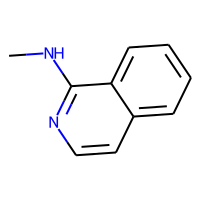
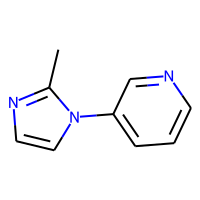
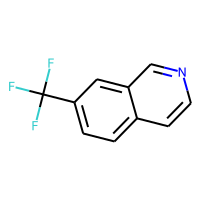
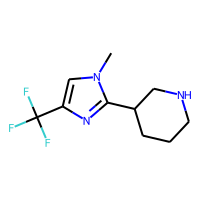
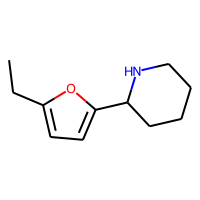
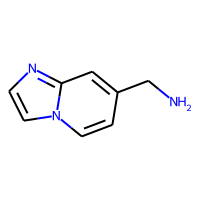
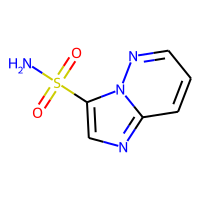

In [15]:
poised.loc[~poised['is_kept']]

In [17]:
dsi.loc[~dsi['is_kept']]

,Catalog ID,PlateID,Well,MW (desalted),CLogP,HBD,TPSA,RotBonds,ID,SMILES,Molecule,is_kept
